## Импорт библиотек

In [4]:
# импорт библиотек
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

pd.set_option('max_columns', 67)
pd.set_option('max_rows', 67)

## Считывание данных в датафрейм

In [5]:
# получение данных из файла в датафрейм 
df = pd.read_csv('session1.csv')
df

,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.address,properties.weather,properties.category,properties.datetime,properties.severity,properties.dead_count,properties.injured_count,properties.road_conditions,properties.participants_count,properties.participant_categories
0,Дорожно-транспортные происшествия,Светлое время суток,51.783772,115.483775,NaN,Шилкинский район,"ДАРАСУН - СОЛНЦЕВО, 143 км",Ясно,Опрокидывание,2019-07-25 16:50:00,С погибшими,1,2,Сухое,3,Все участники
1,Дорожно-транспортные происшествия,Светлое время суток,51.600533,115.405197,NaN,Шилкинский район,"ПЕРВОМАЙСК - ЦАГАН-ОЛУЙ - КОНДУЙ, 32 км",Ясно,Опрокидывание,2020-05-16 18:00:00,Тяжёлый,0,2,Сухое,2,Все участники
2,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",52.045523,115.939236,"Мост,Нерегулируемый перекрёсток",Шилкинский район,Р-297 Амур Чита - Невер - Свободный - Архара -...,Пасмурно,Столкновение,2019-10-03 20:00:00,Легкий,0,1,Сухое,3,Все участники
3,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",51.902130,116.212864,NaN,Шилкинский район,"МОГОЙТУЙ - СРЕТЕНСК - ОЛОЧИ, 137 км",Ясно,Столкновение,2020-11-18 22:00:00,С погибшими,2,0,"Сухое,Недостатки зимнего содержания",3,"Мотоциклисты,Все участники"
4,Дорожно-транспортные происшествия,Светлое время суток,51.775183,115.854371,Жилые дома индивидуальной застройки,Шилкинский район,"с Казаново, ул Чапаева, 24",Ясно,Съезд с дороги,2021-01-31 05:00:00,Легкий,0,2,Заснеженное,2,Все участники
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772279,Дорожно-транспортные происшествия,Светлое время суток,51.310600,39.254200,NaN,Нововоронеж,"г Нововоронеж, зона Восточная промышленная, 24",Пасмурно,Столкновение,2020-01-29 07:10:00,Легкий,0,3,"Мокрое,Недостатки зимнего содержания",4,Все участники
772280,Дорожно-транспортные происшествия,Светлое время суток,51.319556,39.210473,"Жилые дома индивидуальной застройки,Крупный то...",Нововоронеж,"г Нововоронеж, ул Победы, 7",Ясно,Столкновение,2021-07-12 17:10:00,Тяжёлый,0,2,Сухое,3,Все участники
772281,Дорожно-транспортные происшествия,Светлое время суток,51.337020,39.254837,"Жилые дома индивидуальной застройки,Нерегулиру...",Нововоронеж,"г Нововоронеж, ул Полубяновская, 49",Ясно,Опрокидывание,2021-06-20 19:30:00,Легкий,0,1,"Сухое,Отсутствие, плохая различимость горизонт...",1,Все участники
772282,Дорожно-транспортные происшествия,Сумерки,51.321641,39.229946,"АЗС,Остановка общественного транспорта",Нововоронеж,"г Нововоронеж, ш Воронежское, 4",Ясно,Наезд на велосипедиста,2021-07-18 20:30:00,Тяжёлый,0,1,Сухое,2,"Все участники,Велосипедисты"


## Копирование оригинального датафрейма во временный и проведение очистки

In [6]:
# Просмотр количества пустых значений
df.iloc[:].isna().sum()

properties.tags                           0
properties.light                          0
properties.point.lat                   7392
properties.point.long                  7392
properties.nearby                    189712
properties.region                         0
properties.address                    37188
properties.weather                        1
properties.category                       0
properties.datetime                       0
properties.severity                       0
properties.dead_count                     0
properties.injured_count                  0
properties.road_conditions                1
properties.participants_count             0
properties.participant_categories         1
dtype: int64

In [7]:
# Копирование оригального датафрейма во временный для сохранности данных
df2 = df.copy(deep=True)

In [8]:
# удаление пустых значений у признаков properties.road_conditions и properties.participant_categories
df2.drop(df2[df2['properties.road_conditions'].isna()].index, inplace=True)
df2.drop(df2[df2['properties.participant_categories'].isna()].index, inplace=True)

In [9]:
# Просмотр количества пустых значений
df2.iloc[:].isna().sum()

properties.tags                           0
properties.light                          0
properties.point.lat                   7392
properties.point.long                  7392
properties.nearby                    189711
properties.region                         0
properties.address                    37188
properties.weather                        0
properties.category                       0
properties.datetime                       0
properties.severity                       0
properties.dead_count                     0
properties.injured_count                  0
properties.road_conditions                0
properties.participants_count             0
properties.participant_categories         0
dtype: int64

In [10]:
# Удаление пустых значений у признаков properties.point.lat и properties.point.long
df2 = df2.drop(df2[df2['properties.point.lat'].isna()].index)
df2 = df2.drop(df2[df2['properties.point.long'].isna()].index)

In [11]:
# Удаление столбца properties.datetime
df2 = df2.drop(columns=['properties.datetime'])

In [12]:
# Удаление значений "Не установлено" у признака properties.light
df2 = df2.drop(df2[df2['properties.light'] == 'Не установлено'].index)

In [13]:
# Заполнение пустых значений признака properties.nearby на "ничего"
df2['properties.nearby'] = df2['properties.nearby'].fillna('ничего')

In [14]:
# Удаление пустых значений из properties.address
df2.drop(df2[df2['properties.address'].isna()].index, inplace=True)

In [15]:
# Повторная проверка на пустые значения
df2.isna().sum()

properties.tags                      0
properties.light                     0
properties.point.lat                 0
properties.point.long                0
properties.nearby                    0
properties.region                    0
properties.address                   0
properties.weather                   0
properties.category                  0
properties.severity                  0
properties.dead_count                0
properties.injured_count             0
properties.road_conditions           0
properties.participants_count        0
properties.participant_categories    0
dtype: int64

## 2.1 Добавление нового признака

In [16]:
# Чем серьезнее авария, тем больше будет значение properties.severity
df2['properties.severity'] = df2['properties.severity'].map({'Легкий' : 1, 'Тяжёлый' : 2, 'С погибшими' : 3})

#### формирование нескольких датафреймов для получения количества аварий и их отношения ко всем в этом регионе

In [17]:
# Формирование нового датафрейма для получения количества аварий по адресу
new_df = pd.DataFrame()
new_df['all_address'] = df2.groupby(['properties.region', 'properties.address']).size()
new_df = new_df.reset_index()

In [18]:
new_df

,properties.region,properties.address,all_address
0,7 - Завитинский район,"«Завитинск – Поярково» – Платово, 4 км",1
1,7 - Завитинский район,"Завитинск – Поярково, 22 км",1
2,7 - Завитинский район,"Завитинск – Райчихиск, 14 км",1
3,7 - Завитинский район,"Завитинск – Райчихиск, 34 км",1
4,7 - Завитинский район,"Обход г. Завитинска, 3 км",1
...,...,...,...
454940,пос. Видяево,"п Видяево, ул Центральная, 6",1
454941,пос. Горный,"п Горный, МЕСТНЫЕ ДОРОГИ",1
454942,пос. Горный,"п Горный, МЕСТНЫЕ ДОРОГИ, 3 км",2
454943,пос. Горный,"п Горный, ул Солнечная, 139",1


In [19]:
# Формирование нового датафрейма для получения количества аварий по региону
regions = pd.DataFrame()
regions['all'] = df2.groupby(['properties.region']).size()
regions = regions.reset_index()
regions

,properties.region,all
0,7 - Завитинский район,25
1,Абаза,15
2,Абазинский район,23
3,Абакан,487
4,Абанский район,65
...,...,...
2261,им. Полины Осипенко район,11
2262,пгт. Углегорск,3
2263,пос. Видяево,1
2264,пос. Горный,4


In [20]:
# Формирование нового датафрейма для получения доли по отшношению ко всем в регионе 
res = pd.merge(new_df, regions)

In [21]:
# Высчитывание доли
res['fraction'] = res.apply(lambda x: x['all_address'] / x['all'], axis=1)

In [22]:
res

,properties.region,properties.address,all_address,all,fraction
0,7 - Завитинский район,"«Завитинск – Поярково» – Платово, 4 км",1,25,0.04
1,7 - Завитинский район,"Завитинск – Поярково, 22 км",1,25,0.04
2,7 - Завитинский район,"Завитинск – Райчихиск, 14 км",1,25,0.04
3,7 - Завитинский район,"Завитинск – Райчихиск, 34 км",1,25,0.04
4,7 - Завитинский район,"Обход г. Завитинска, 3 км",1,25,0.04
...,...,...,...,...,...
454940,пос. Видяево,"п Видяево, ул Центральная, 6",1,1,1.00
454941,пос. Горный,"п Горный, МЕСТНЫЕ ДОРОГИ",1,4,0.25
454942,пос. Горный,"п Горный, МЕСТНЫЕ ДОРОГИ, 3 км",2,4,0.50
454943,пос. Горный,"п Горный, ул Солнечная, 139",1,4,0.25


In [23]:
# Объединение df2 и res
df2 = pd.merge(res, df2)

In [24]:
df2.head(3)

,properties.region,properties.address,all_address,all,fraction,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.weather,properties.category,properties.severity,properties.dead_count,properties.injured_count,properties.road_conditions,properties.participants_count,properties.participant_categories
0,7 - Завитинский район,"«Завитинск – Поярково» – Платово, 4 км",1,25,0.04,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",50.109983,129.259086,ничего,Ясно,Съезд с дороги,1,0,1,Сухое,1,Все участники
1,7 - Завитинский район,"Завитинск – Поярково, 22 км",1,25,0.04,Дорожно-транспортные происшествия,Светлое время суток,50.076257,129.293976,Выезд с прилегающей территории,Ясно,Столкновение,2,0,2,Сухое,3,Все участники
2,7 - Завитинский район,"Завитинск – Райчихиск, 14 км",1,25,0.04,Дорожно-транспортные происшествия,Светлое время суток,49.993340,129.373069,ничего,Ясно,Опрокидывание,1,0,1,Сухое,2,"Мотоциклисты,Все участники"


### Рассчитывание индекса опасности по формуле fraction' * all_address * properties.severity, где, чем больше значение, тем больше ущерб от аварии

In [25]:
# Рассчитывание значения индекса и добавление его в новый столбец
df2['index_of_danger'] = df2.apply(lambda x: x['fraction'] * x['all_address'] * x['properties.severity'], axis=1)

In [26]:
df2.head(3)

,properties.region,properties.address,all_address,all,fraction,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.weather,properties.category,properties.severity,properties.dead_count,properties.injured_count,properties.road_conditions,properties.participants_count,properties.participant_categories,index_of_danger
0,7 - Завитинский район,"«Завитинск – Поярково» – Платово, 4 км",1,25,0.04,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",50.109983,129.259086,ничего,Ясно,Съезд с дороги,1,0,1,Сухое,1,Все участники,0.04
1,7 - Завитинский район,"Завитинск – Поярково, 22 км",1,25,0.04,Дорожно-транспортные происшествия,Светлое время суток,50.076257,129.293976,Выезд с прилегающей территории,Ясно,Столкновение,2,0,2,Сухое,3,Все участники,0.08
2,7 - Завитинский район,"Завитинск – Райчихиск, 14 км",1,25,0.04,Дорожно-транспортные происшествия,Светлое время суток,49.993340,129.373069,ничего,Ясно,Опрокидывание,1,0,1,Сухое,2,"Мотоциклисты,Все участники",0.04


In [27]:
# Просмотр распределение индекса опасности
df2['index_of_danger'].describe()

count    728145.000000
mean          0.055492
std           0.298860
min           0.000072
25%           0.001507
50%           0.006231
75%           0.026846
max          28.680498
Name: index_of_danger, dtype: float64

### Учитывая, что квартиль 75% равен 0.026846, можно утверждать, что индексы больше этого будут отображать аварии со значительным ущербом 

## Кодирование нечисловых признаков с помощью LabelEncoder

In [28]:
le = preprocessing.LabelEncoder()
df2['properties.tags'] = le.fit_transform(df2['properties.tags'])

In [29]:
le1 = preprocessing.LabelEncoder()
df2['properties.light'] = le1.fit_transform(df2['properties.light'])

In [30]:
df2['properties.nearby'] = df2['properties.nearby'].fillna("ничего")

In [31]:
le2 = preprocessing.LabelEncoder()
df2['properties.nearby'] = le2.fit_transform(df2['properties.nearby'])

In [32]:
le3 = preprocessing.LabelEncoder()
df2['properties.weather'] = le3.fit_transform(df2['properties.weather'])

In [33]:
le4 = preprocessing.LabelEncoder()
df2['properties.category'] = le4.fit_transform(df2['properties.category'])

In [34]:
le6 = preprocessing.LabelEncoder()
df2['properties.road_conditions'] = le6.fit_transform(df2['properties.road_conditions'])

In [35]:
le7 = preprocessing.LabelEncoder()
df2['properties.participant_categories'] = le7.fit_transform(df2['properties.participant_categories'])

## Доудаление столбцов, которые будут мешать обучению

In [36]:
df2.drop(columns=['properties.region', 'properties.address', 'properties.point.lat',
                  'properties.point.long'], inplace=True)

In [37]:
df2.drop(['all_address', 'all', 'fraction'], axis=1, inplace=True)

## Скалирование данных и с помощью метода главных компонент приведение всех признаков в два главных признака

In [38]:
# Скалирование данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df2)
X_scale = scaler.transform(df2)
scaled_data = pd.DataFrame(X_scale, columns=df2.columns)

# Уменьшение размерности датафрейма до 2-х измерений
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)
np.shape(x_pca)

(728145, 2)

## Определение наилучшего количества кластеров по "методу локтя"

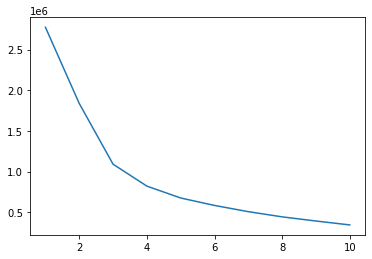

In [39]:
from sklearn.cluster import KMeans
wgcc = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmean.fit(x_pca)
    wgcc.append(kmean.inertia_)
plt.plot(range(1,11), wgcc);

### Выбираю 3 кластера

## 2.2 Кластеризация

## Выбор моделей

### Будут использоваться такие модели кластеризации как Kmeans, Birch и GaussianMixture, так как позволяют работать с большими объемами данных и выбирать количество кластеров

### kmeans - 

Он разбивает множество элементов векторного пространства на заранее известное число кластеров k.

Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике

### Birch -

это алгоритм интеллектуального анализа данных без учителя, используемый для осуществления иерархической кластеризации на наборах данных большого размера. Преимуществом BIRCH является возможность метода динамически кластеризовать по мере поступления многомерных метрических точек данных в попытке получить кластеризацию лучшего качества для имеющегося набора ресурсов

### GaussianMixture -

Модель смеси Гаусса (GMM) пытается найти смесь многомерных гауссовских распределений вероятностей, которые лучше всего моделируют любой входной набор данных. В простейшем случае ГММ могут использоваться для поиска кластеров таким же образом, как k-средние

## Обучение kmeans

In [40]:
# Получение распределения от kmeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
label = kmeans.fit_predict(x_pca)

### График, используется scatter, тк наиболее демонстративно показывает распределение кластеров

### График kmeans

Text(0, 0.5, 'Second Principal Component')

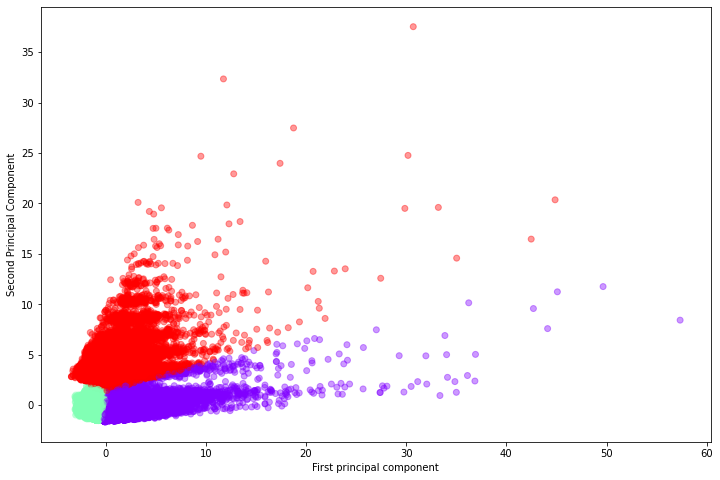

In [41]:
# График распределения кластеров в kmeans
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=label,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [42]:
# Просмотр того, как распределились данные 
label = pd.Series(label)
label.value_counts()

0    366051
1    292662
2     69432
dtype: int64

## Birch

In [43]:
# Получение распределения от Birch
from sklearn.cluster import Birch

brc = Birch(n_clusters=3)
brc.fit(x_pca)

label2 = brc.predict(x_pca)

In [44]:
# Просмотр того, как распределились данные 
label2 = pd.Series(label2)
label2.value_counts()

0    725584
2      2488
1        73
dtype: int64

### График Birch

Text(0, 0.5, 'Second Principal Component')

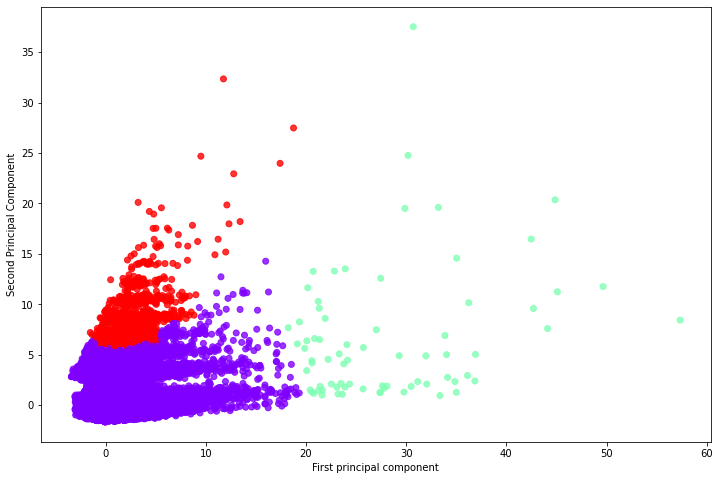

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=label2,cmap='rainbow', alpha=0.8)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## GaussianMixture

In [46]:
# Получение распределения от GaussianMixture
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(3, covariance_type='full', random_state=0).fit(x_pca)

labels3 = gmm.predict(x_pca)

In [47]:
labels3 = pd.Series(labels3)
labels3.value_counts()

0    439789
2    201455
1     86901
dtype: int64

### График GaussianMixture

Text(0, 0.5, 'Second Principal Component')

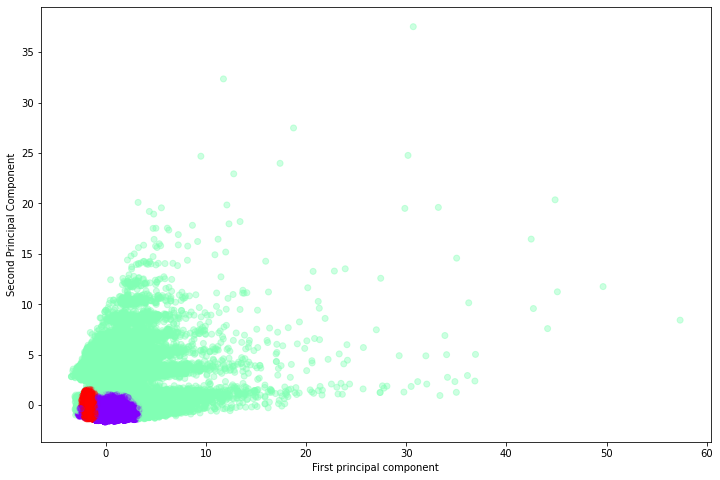

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels3,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## 2.3 Разбиение набора данных

### Обычно данные разбиваются в соотношениях 66/33, 70/30 или 80/20 в зависимости от объема данных, как рекомендуется в множестве пособий, я же буду использовать 70/30 как нечто среднее и оптимальное для большинства случаев

In [50]:
from sklearn.model_selection import train_test_split

X = df2
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
# Импорт метрик
from sklearn import metrics

In [54]:
print('метрики kmeans = ' + str(metrics.calinski_harabasz_score(x_pca, label)) + '\n' +
     'метрики Birch = ' + str(metrics.calinski_harabasz_score(x_pca, label2)) + '\n' +
      'метрики GaussianMixture = ' + str(metrics.calinski_harabasz_score(x_pca, labels3)))

метрики kmeans = 562638.4478850845
метрики Birch = 31875.137232032343
метрики GaussianMixture = 391416.17605215183


### метрики Calinski-Harabasz чем больше значение, тем лучше получилось распределение, поэтому выбор пал на kmeans

## Обозначение и именование кластеров

In [56]:
# Добавление кластеров в датафрейм
df2['cluster'] = label

### Просмотр того, как распределились данные по кластерам

In [58]:
df2[df2['cluster'] == 0].describe()

,properties.tags,properties.light,properties.nearby,properties.weather,properties.category,properties.severity,properties.dead_count,properties.injured_count,properties.road_conditions,properties.participants_count,properties.participant_categories,index_of_danger,cluster
count,366051.000000,366051.000000,366051.000000,366051.000000,366051.000000,366051.000000,366051.000000,366051.000000,366051.000000,366051.000000,366051.000000,366051.000000,366051.0
mean,0.090627,2.359906,23121.156219,19.039003,15.509350,1.337344,0.000576,1.572305,3026.217778,2.912247,9.616163,0.051423,0.0
std,0.287439,1.190713,10772.591688,7.784741,1.641918,0.473889,0.027503,1.059076,1498.226505,1.291077,6.963780,0.182003,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000072,0.0
25%,0.000000,2.000000,14202.000000,10.000000,16.000000,1.000000,0.000000,1.000000,2309.000000,2.000000,7.000000,0.001570,0.0
50%,0.000000,3.000000,26424.000000,25.000000,16.000000,1.000000,0.000000,1.000000,3893.000000,3.000000,7.000000,0.006838,0.0
75%,0.000000,3.000000,33815.000000,25.000000,16.000000,2.000000,0.000000,2.000000,3893.000000,3.000000,7.000000,0.029605,0.0
max,3.000000,4.000000,33815.000000,31.000000,17.000000,3.000000,4.000000,57.000000,4681.000000,59.000000,50.000000,7.758621,0.0


In [59]:
df2[df2['cluster'] == 1].describe()

,properties.tags,properties.light,properties.nearby,properties.weather,properties.category,properties.severity,properties.dead_count,properties.injured_count,properties.road_conditions,properties.participants_count,properties.participant_categories,index_of_danger,cluster
count,292662.000000,292662.000000,292662.000000,292662.000000,292662.000000,292662.000000,292662.0,292662.000000,292662.000000,292662.000000,292662.000000,292662.000000,292662.0
mean,0.191832,2.033260,19865.518434,17.965226,9.407063,1.424097,0.0,1.033305,2892.815176,1.899444,30.795532,0.027942,1.0
std,0.472289,1.368204,10485.889699,8.291488,3.126250,0.494206,0.0,0.181325,1593.317377,0.450834,16.517621,0.106783,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000072,1.0
25%,0.000000,0.000000,10664.000000,10.000000,9.000000,1.000000,0.0,1.000000,894.000000,2.000000,7.000000,0.001098,1.0
50%,0.000000,3.000000,21232.000000,25.000000,9.000000,1.000000,0.0,1.000000,3893.000000,2.000000,44.000000,0.003984,1.0
75%,0.000000,3.000000,29391.000000,25.000000,10.000000,2.000000,0.0,1.000000,3893.000000,2.000000,44.000000,0.015579,1.0
max,3.000000,4.000000,33815.000000,31.000000,17.000000,2.000000,0.0,3.000000,4681.000000,6.000000,50.000000,4.511509,1.0


In [60]:
df2[df2['cluster'] == 2].describe()

,properties.tags,properties.light,properties.nearby,properties.weather,properties.category,properties.severity,properties.dead_count,properties.injured_count,properties.road_conditions,properties.participants_count,properties.participant_categories,index_of_danger,cluster
count,69432.000000,69432.000000,69432.000000,69432.000000,69432.000000,69432.000000,69432.000000,69432.000000,69432.000000,69432.000000,69432.000000,69432.000000,69432.0
mean,0.100717,2.128529,25291.750634,18.461862,12.385528,2.985353,1.167228,0.737398,3019.000907,2.735453,21.195688,0.193070,2.0
std,0.342458,1.170190,11214.311445,8.170763,3.759024,0.133968,0.588293,1.290820,1507.451945,1.621378,16.968206,0.831732,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000216,2.0
25%,0.000000,2.000000,16245.000000,10.000000,9.000000,3.000000,1.000000,0.000000,1532.000000,2.000000,7.000000,0.007481,2.0
50%,0.000000,3.000000,30907.000000,25.000000,12.000000,3.000000,1.000000,0.000000,3893.000000,2.000000,7.000000,0.027211,2.0
75%,0.000000,3.000000,33815.000000,25.000000,16.000000,3.000000,1.000000,1.000000,3893.000000,3.000000,44.000000,0.096774,2.0
max,3.000000,4.000000,33815.000000,31.000000,17.000000,3.000000,19.000000,40.000000,4681.000000,50.000000,50.000000,28.680498,2.0


### Просмотрев такие признаки, как properties.dead_count, properties.injured_count и index_of_danger, можно сделать вывод, что
### 1 - кластер с наименьшим уровнем опасности
### 0 - кластер со средним уровнем опасности
### 2 - кластер с наивысшим уровнем опасности, когда почти всегда есть погибшие

## 2.4 Отчет

### По результатам второй сессии были подготовлены тестовая и обучающая выборки для дальнейшей работы

### В 2.1 был добавлен новый признак, показывающий индекс опасности, что позволило улучшить качество модели

### В 2.2 была проведена кластеризация, по итогам которой данные были разбиты на три кластера с помощью kmeans

### В 2.3 Данные были разбиты на тестовую и обучающую выборки в соотношение 70/30, объяснение почему так было в самом задании